In [0]:
"""
Phase 3 Comprehensive Statistics Collection
Flight Delay Prediction Project - 5 Year Dataset (2015-2019)

Run this in a Databricks notebook to collect all statistics needed for Phase 3 report.
Outputs are printed directly to notebook and key files saved to your working directory.

CORRECT CHECKPOINT STRUCTURE:
- Checkpoint 5: Comprehensive (all features before final removal)
- Checkpoint 5a: Final Clean (production ready)
"""

from pyspark.sql import SparkSession
from pyspark.sql.functions import (
    col, count, when, isnan, isnull, countDistinct, avg, stddev, min, max,
    mean, variance, skewness, kurtosis, sum as spark_sum, percentile_approx, corr
)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("=" * 100)
print("PHASE 3: COMPREHENSIVE STATISTICS COLLECTION")
print("Flight Delay Prediction - 5 Year Dataset (2015-2019)")
print("=" * 100)
print(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 100)

# =============================================================================
# PATHS CONFIGURATION
# =============================================================================
BASE_PATH = "dbfs:/student-groups/Group_4_4/"
OTPW_PATH = "dbfs:/mnt/mids-w261/OTPW_60M_Backup/"
OUTPUT_PATH = "/dbfs/student-groups/Group_4_4/Charts_5Y/"  # For saving images and CSVs

# Dictionary to store all statistics
stats = {
    'metadata': {
        'generated_at': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'dataset_type': '5-year (60 months)',
        'time_period': '2015-2019'
    }
}

# =============================================================================
# LOAD ALL CHECKPOINT STAGES
# =============================================================================
print("\n" + "=" * 100)
print("LOADING ALL CHECKPOINT STAGES")
print("=" * 100)

# Stage 0: OTPW Raw data
print("\nStage 0: OTPW Raw Data...")
try:
    df_stage0 = spark.read.parquet(OTPW_PATH)
    df_stage0 = df_stage0.filter(col('YEAR').between(2015, 2019))
    stage0_count = df_stage0.count()
    stage0_cols = len(df_stage0.columns)
    print(f"✓ Stage 0 loaded: {stage0_count:,} rows x {stage0_cols} columns")
    stats['stage0'] = {'rows': stage0_count, 'columns': stage0_cols, 'name': 'OTPW Raw Data'}
except Exception as e:
    print(f"⚠ Could not load Stage 0: {e}")
    df_stage0 = None
    stats['stage0'] = {'error': str(e)}

# Checkpoint 1: Initial joined data
print("\nCheckpoint 1: Initial Joined Data (After Join, Before Cleaning)...")
try:
    df_stage1 = spark.read.parquet(f"{BASE_PATH}checkpoint_1_initial_joined_5Y_2015-2019.parquet")
    stage1_count = df_stage1.count()
    stage1_cols = len(df_stage1.columns)
    print(f"✓ Checkpoint 1 loaded: {stage1_count:,} rows x {stage1_cols} columns")
    stats['stage1'] = {'rows': stage1_count, 'columns': stage1_cols, 'name': 'Initial Joined (Checkpoint 1)'}
except Exception as e:
    print(f"⚠ Could not load Checkpoint 1: {e}")
    df_stage1 = None
    stats['stage1'] = {'error': str(e)}

# Checkpoint 2: Cleaned and imputed
print("\nCheckpoint 2: Cleaned & Imputed...")
try:
    df_stage2 = spark.read.parquet(f"{BASE_PATH}checkpoint_2_cleaned_imputed_2015-2019.parquet")
    stage2_count = df_stage2.count()
    stage2_cols = len(df_stage2.columns)
    print(f"✓ Checkpoint 2 loaded: {stage2_count:,} rows x {stage2_cols} columns")
    stats['stage2'] = {'rows': stage2_count, 'columns': stage2_cols, 'name': 'Cleaned & Imputed (Checkpoint 2)'}
except Exception as e:
    print(f"⚠ Could not load Checkpoint 2: {e}")
    df_stage2 = None
    stats['stage2'] = {'error': str(e)}

# Checkpoint 3: Basic features
print("\nCheckpoint 3: Basic Features...")
try:
    df_stage3 = spark.read.parquet(f"{BASE_PATH}checkpoint_3_basic_features_2015-2019.parquet")
    stage3_count = df_stage3.count()
    stage3_cols = len(df_stage3.columns)
    print(f"✓ Checkpoint 3 loaded: {stage3_count:,} rows x {stage3_cols} columns")
    stats['stage3'] = {'rows': stage3_count, 'columns': stage3_cols, 'name': 'Basic Features (Checkpoint 3)'}
except Exception as e:
    print(f"⚠ Could not load Checkpoint 3: {e}")
    df_stage3 = None
    stats['stage3'] = {'error': str(e)}

# Checkpoint 4: Advanced features
print("\nCheckpoint 4: Advanced Features...")
try:
    df_stage4 = spark.read.parquet(f"{BASE_PATH}checkpoint_4_advanced_features_2015-2019.parquet")
    stage4_count = df_stage4.count()
    stage4_cols = len(df_stage4.columns)
    print(f"✓ Checkpoint 4 loaded: {stage4_count:,} rows x {stage4_cols} columns")
    stats['stage4'] = {'rows': stage4_count, 'columns': stage4_cols, 'name': 'Advanced Features (Checkpoint 4)'}
except Exception as e:
    print(f"⚠ Could not load Checkpoint 4: {e}")
    df_stage4 = None
    stats['stage4'] = {'error': str(e)}

# Checkpoint 5: Comprehensive (all features before final removal)
print("\nCheckpoint 5: Comprehensive (All Features Before Final Removal)...")
try:
    df_stage5 = spark.read.parquet(f"{BASE_PATH}checkpoint_5_final_clean_2015-2019.parquet")
    stage5_count = df_stage5.count()
    stage5_cols = len(df_stage5.columns)
    print(f"✓ Checkpoint 5 loaded: {stage5_count:,} rows x {stage5_cols} columns")
    stats['stage5'] = {'rows': stage5_count, 'columns': stage5_cols, 'name': 'Comprehensive (Checkpoint 5)'}
except Exception as e:
    print(f"⚠ Could not load Checkpoint 5: {e}")
    df_stage5 = None
    stats['stage5'] = {'error': str(e)}

# Checkpoint 5a: Final clean (production ready)
print("\nCheckpoint 5a: Final Clean (Production Ready)...")
try:
    df_stage5a = spark.read.parquet(f"{BASE_PATH}checkpoint_5_final_clean_2015-2019_refined.parquet")
    stage5a_count = df_stage5a.count()
    stage5a_cols = len(df_stage5a.columns)
    print(f"✓ Checkpoint 5a loaded: {stage5a_count:,} rows x {stage5a_cols} columns")
    stats['stage5a'] = {'rows': stage5a_count, 'columns': stage5a_cols, 'name': 'Final Clean (Checkpoint 5a)'}
except Exception as e:
    print(f"⚠ Could not load Checkpoint 5a: {e}")
    df_stage5a = None
    stats['stage5a'] = {'error': str(e)}

# =============================================================================
# SECTION 3.3: PIPELINE PROGRESSION SUMMARY
# =============================================================================
print("\n" + "=" * 100)
print("SECTION 3.3: DATA PIPELINE PROGRESSION")
print("=" * 100)

pipeline_data = []
for stage_key in ['stage0', 'stage1', 'stage2', 'stage3', 'stage4', 'stage5', 'stage5a']:
    if stage_key in stats and 'rows' in stats[stage_key]:
        pipeline_data.append({
            'Stage': stats[stage_key]['name'],
            'Rows': f"{stats[stage_key]['rows']:,}",
            'Columns': stats[stage_key]['columns']
        })

df_pipeline = pd.DataFrame(pipeline_data)
print("\nPipeline Progression:")
print(df_pipeline.to_string(index=False))

# Save to CSV
df_pipeline.to_csv(f"{OUTPUT_PATH}phase3_pipeline_progression.csv", index=False)
print(f"\n✓ Saved to: {OUTPUT_PATH}phase3_pipeline_progression.csv")

# =============================================================================
# DETAILED STATISTICS FOR EACH STAGE
# =============================================================================

# Helper function to get delay statistics
def get_delay_stats(df, stage_name):
    """Calculate delay statistics for a dataset"""
    if df is None or 'DEP_DEL15' not in df.columns:
        return None
    
    print(f"\n{stage_name} - Delay Statistics:")
    print("-" * 80)
    
    total = df.count()
    delayed = df.filter(col('DEP_DEL15') == 1).count()
    ontime = total - delayed
    delay_rate = (delayed / total * 100) if total > 0 else 0
    
    print(f"  Total flights: {total:,}")
    print(f"  On-time (0): {ontime:,} ({100-delay_rate:.2f}%)")
    print(f"  Delayed (1): {delayed:,} ({delay_rate:.2f}%)")
    print(f"  Imbalance ratio: {ontime/delayed:.2f}:1" if delayed > 0 else "  No delays")
    
    return {
        'total': total,
        'delayed': delayed,
        'ontime': ontime,
        'delay_rate': delay_rate,
        'imbalance_ratio': ontime/delayed if delayed > 0 else None
    }

# =============================================================================
# STAGE 0: RAW OTPW DATA ANALYSIS
# =============================================================================
print("\n" + "=" * 100)
print("STAGE 0: RAW OTPW DATA (2015-2019)")
print("=" * 100)

if df_stage0 is not None:
    delay_stats = get_delay_stats(df_stage0, "Raw OTPW Data")
    if delay_stats:
        stats['stage0'].update(delay_stats)
    
    # Sample columns
    print(f"\nSample columns (first 15):")
    for i, col_name in enumerate(df_stage0.columns[:15], 1):
        print(f"  {i:2d}. {col_name}")
    
    # Unique values for key dimensions
    print("\nKey Dimensions:")
    for col_name in ['ORIGIN', 'DEST', 'OP_UNIQUE_CARRIER']:
        if col_name in df_stage0.columns:
            unique_count = df_stage0.select(col_name).distinct().count()
            print(f"  Unique {col_name}: {unique_count:,}")

# =============================================================================
# CHECKPOINT 1: INITIAL JOINED DATA
# =============================================================================
print("\n" + "=" * 100)
print("CHECKPOINT 1: INITIAL JOINED DATA (After Join, Before Cleaning)")
print("=" * 100)

if df_stage1 is not None:
    delay_stats = get_delay_stats(df_stage1, "Initial Joined Data")
    if delay_stats:
        stats['stage1'].update(delay_stats)
    
    # Check for weather columns
    weather_cols = [c for c in df_stage1.columns if 'Hourly' in c or 'Daily' in c or 'weather' in c.lower()]
    print(f"\nWeather columns added: {len(weather_cols)}")
    print(f"Sample weather columns: {', '.join(weather_cols[:5])}...")
    
    # Check data quality - nulls in sample columns
    print("\nData Quality Check (Sample Columns):")
    total_rows = df_stage1.count()
    for col_name in ['DEP_DEL15', 'ORIGIN', 'DEST', 'DISTANCE'] + weather_cols[:2]:
        if col_name in df_stage1.columns:
            null_count = df_stage1.filter(col(col_name).isNull()).count()
            null_pct = (null_count / total_rows * 100) if total_rows > 0 else 0
            if null_pct > 0:
                print(f"  {col_name}: {null_count:,} nulls ({null_pct:.2f}%)")

# =============================================================================
# CHECKPOINT 2: CLEANED & IMPUTED DATA
# =============================================================================
print("\n" + "=" * 100)
print("CHECKPOINT 2: CLEANED & IMPUTED DATA")
print("=" * 100)

if df_stage2 is not None:
    delay_stats = get_delay_stats(df_stage2, "Cleaned & Imputed Data")
    if delay_stats:
        stats['stage2'].update(delay_stats)
    
    # Calculate data reduction from Stage 1
    if 'stage1' in stats and 'rows' in stats['stage1']:
        rows_removed = stats['stage1']['rows'] - stats['stage2']['rows']
        pct_removed = (rows_removed / stats['stage1']['rows'] * 100)
        print(f"\nData Cleaning Impact:")
        print(f"  Rows removed: {rows_removed:,} ({pct_removed:.2f}%)")
        print(f"  Reason: Cancelled, diverted, and invalid flights removed")
        stats['stage2']['rows_removed'] = rows_removed
        stats['stage2']['pct_removed'] = pct_removed
    
    # Check for remaining nulls
    print("\nRemaining Nulls After Imputation:")
    critical_cols = ['DEP_DEL15', 'ORIGIN', 'DEST', 'DISTANCE', 'CRS_DEP_TIME', 'OP_UNIQUE_CARRIER']
    total_nulls = 0
    for col_name in critical_cols:
        if col_name in df_stage2.columns:
            null_count = df_stage2.filter(col(col_name).isNull()).count()
            total_nulls += null_count
            if null_count > 0:
                print(f"  {col_name}: {null_count:,} nulls")
    
    if total_nulls == 0:
        print("  ✓ No nulls in critical columns - data is clean")
    
    stats['stage2']['remaining_nulls'] = total_nulls

# =============================================================================
# CHECKPOINT 3: BASIC FEATURES
# =============================================================================
print("\n" + "=" * 100)
print("CHECKPOINT 3: BASIC FEATURES")
print("=" * 100)

if df_stage3 is not None:
    delay_stats = get_delay_stats(df_stage3, "Basic Features")
    if delay_stats:
        stats['stage3'].update(delay_stats)
    
    # Calculate features added
    if 'stage2' in stats and 'columns' in stats['stage2']:
        features_added = stats['stage3']['columns'] - stats['stage2']['columns']
        print(f"\nFeature Engineering:")
        print(f"  Features added: {features_added}")
        stats['stage3']['features_added'] = features_added
    
    # Identify basic features (common patterns)
    basic_feature_patterns = ['departure_hour', 'departure_month', 'departure_dayofweek', 
                              'is_weekend', 'is_peak_hour', 'season', 'distance_category']
    basic_features = [c for c in df_stage3.columns 
                      if any(pattern in c.lower() for pattern in basic_feature_patterns)]
    
    print(f"\nBasic Features Created ({len(basic_features)}):")
    for feat in basic_features[:10]:
        print(f"  • {feat}")
    if len(basic_features) > 10:
        print(f"  ... and {len(basic_features) - 10} more")

# =============================================================================
# CHECKPOINT 4: ADVANCED FEATURES
# =============================================================================
print("\n" + "=" * 100)
print("CHECKPOINT 4: ADVANCED FEATURES")
print("=" * 100)

if df_stage4 is not None:
    delay_stats = get_delay_stats(df_stage4, "Advanced Features")
    if delay_stats:
        stats['stage4'].update(delay_stats)
    
    # Calculate features added
    if 'stage3' in stats and 'columns' in stats['stage3']:
        features_added = stats['stage4']['columns'] - stats['stage3']['columns']
        print(f"\nAdvanced Feature Engineering:")
        print(f"  Additional features added: {features_added}")
        stats['stage4']['features_added'] = features_added
    
    # Identify advanced features (rolling, aggregates, etc.)
    advanced_patterns = ['rolling', '_24h', '_ratio', '_avg', '_median', 'total_flights', 
                        'congestion', 'performance', 'severity']
    advanced_features = [c for c in df_stage4.columns 
                        if any(pattern in c.lower() for pattern in advanced_patterns)]
    
    print(f"\nAdvanced Features Created ({len(advanced_features)}):")
    for feat in advanced_features[:10]:
        print(f"  • {feat}")
    if len(advanced_features) > 10:
        print(f"  ... and {len(advanced_features) - 10} more")

# =============================================================================
# CHECKPOINT 5: COMPREHENSIVE (All Features Before Final Removal)
# =============================================================================
print("\n" + "=" * 100)
print("CHECKPOINT 5: COMPREHENSIVE (All Features Before Final Removal)")
print("=" * 100)

if df_stage5 is not None:
    delay_stats = get_delay_stats(df_stage5, "Comprehensive All Features")
    if delay_stats:
        stats['stage5'].update(delay_stats)
    
    print(f"\nComplete Feature Set:")
    print(f"  Total features: {stats['stage5']['columns']}")
    print(f"  Total records: {stats['stage5']['rows']:,}")
    
    # Sample of all columns
    print(f"\nAll Features in Checkpoint 5 (first 20):")
    for i, col_name in enumerate(df_stage5.columns[:20], 1):
        print(f"  {i:3d}. {col_name}")
    if len(df_stage5.columns) > 20:
        print(f"  ... and {len(df_stage5.columns) - 20} more features")

# =============================================================================
# CHECKPOINT 5a: FINAL CLEAN (Production Ready)
# =============================================================================
print("\n" + "=" * 100)
print("CHECKPOINT 5a: FINAL CLEAN (Production Ready)")
print("=" * 100)

if df_stage5a is not None:
    delay_stats = get_delay_stats(df_stage5a, "Final Clean Dataset")
    if delay_stats:
        stats['stage5a'].update(delay_stats)
    
    # Calculate features removed from Checkpoint 5
    if 'stage5' in stats and 'columns' in stats['stage5']:
        features_removed = stats['stage5']['columns'] - stats['stage5a']['columns']
        print(f"\nFeature Selection Impact:")
        print(f"  Features removed: {features_removed}")
        print(f"  Final feature count: {stats['stage5a']['columns']}")
        stats['stage5a']['features_removed'] = features_removed
    
    # Final feature list
    print(f"\nFinal Features ({stats['stage5a']['columns']}):")
    for i, col_name in enumerate(df_stage5a.columns, 1):
        print(f"  {i:3d}. {col_name}")
    
    # Data quality validation
    print("\n" + "-" * 80)
    print("PRODUCTION READINESS CHECKS")
    print("-" * 80)
    
    # Check for nulls
    total_nulls = 0
    for col_name in df_stage5a.columns:
        null_count = df_stage5a.filter(col(col_name).isNull()).count()
        total_nulls += null_count
        if null_count > 0:
            total_rows = df_stage5a.count()
            null_pct = (null_count / total_rows * 100)
            print(f"  ⚠ {col_name}: {null_count:,} nulls ({null_pct:.4f}%)")
    
    if total_nulls == 0:
        print("  ✓ No null values - dataset is complete")
    
    stats['stage5a']['total_nulls'] = total_nulls
    
    # Check for duplicates
    print("\nChecking for duplicate records...")
    total_rows = df_stage5a.count()
    distinct_rows = df_stage5a.distinct().count()
    duplicates = total_rows - distinct_rows
    
    if duplicates == 0:
        print("  ✓ No duplicate records")
    else:
        print(f"  ⚠ {duplicates:,} duplicate records found")
    
    stats['stage5a']['duplicates'] = duplicates

# =============================================================================
# EXPLORATORY DATA ANALYSIS (EDA) - Using Final Dataset
# =============================================================================
print("\n" + "=" * 100)
print("SECTION 3.3.6: EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 100)

if df_stage5a is not None:
    print("\nPerforming EDA on Final Clean Dataset (Checkpoint 5a)...")
    
    # Summary statistics for key numerical features
    print("\n" + "-" * 80)
    print("SUMMARY STATISTICS - Numerical Features")
    print("-" * 80)
    
    numerical_features = [
        'DISTANCE', 'CRS_ELAPSED_TIME', 'CRS_DEP_TIME', 'CRS_ARR_TIME'
    ]
    
    # Add any weather features that exist
    weather_numerical = [c for c in df_stage5a.columns 
                        if any(w in c for w in ['Temperature', 'WindSpeed', 'Visibility', 'Precipitation', 'Pressure'])]
    numerical_features.extend(weather_numerical[:4])  # Add up to 4 weather features
    
    numerical_features = [f for f in numerical_features if f in df_stage5a.columns]
    
    summary_stats = {}
    for feature in numerical_features[:8]:  # Limit to 8 for readability
        print(f"\n{feature}:")
        
        stats_row = df_stage5a.select(
            count(col(feature)).alias('count'),
            mean(col(feature)).alias('mean'),
            stddev(col(feature)).alias('std'),
            min(col(feature)).alias('min'),
            max(col(feature)).alias('max'),
            percentile_approx(col(feature), 0.25).alias('q25'),
            percentile_approx(col(feature), 0.50).alias('median'),
            percentile_approx(col(feature), 0.75).alias('q75')
        ).first()
        
        if stats_row and stats_row['mean'] is not None:
            summary_stats[feature] = {
                'count': stats_row['count'],
                'mean': float(stats_row['mean']),
                'std': float(stats_row['std']) if stats_row['std'] else 0,
                'min': float(stats_row['min']),
                'q25': float(stats_row['q25']),
                'median': float(stats_row['median']),
                'q75': float(stats_row['q75']),
                'max': float(stats_row['max'])
            }
            
            print(f"  Count: {stats_row['count']:,}")
            print(f"  Mean: {stats_row['mean']:.2f}")
            print(f"  Std: {stats_row['std']:.2f}")
            print(f"  Min: {stats_row['min']:.2f}")
            print(f"  25%: {stats_row['q25']:.2f}")
            print(f"  Median: {stats_row['median']:.2f}")
            print(f"  75%: {stats_row['q75']:.2f}")
            print(f"  Max: {stats_row['max']:.2f}")
    
    stats['eda'] = {'summary_statistics': summary_stats}
    
    # Correlation Analysis with Target
    print("\n" + "-" * 80)
    print("CORRELATION ANALYSIS - Top Features Correlated with Delay")
    print("-" * 80)
    
    if 'DEP_DEL15' in df_stage5a.columns:
        correlations = {}
        correlation_features = numerical_features[:10]  # Analyze top 10
        
        for feature in correlation_features:
            try:
                correlation = df_stage5a.select(
                    corr(col('DEP_DEL15').cast('double'), col(feature).cast('double'))
                ).first()[0]
                
                if correlation is not None:
                    correlations[feature] = float(correlation)
                    print(f"  {feature:40s}: {correlation:7.4f}")
            except Exception as e:
                print(f"  {feature:40s}: Could not compute")
        
        # Sort by absolute correlation
        sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
        
        print(f"\n  Top 5 Strongest Correlations (absolute value):")
        for feat, corr_val in sorted_corr[:5]:
            print(f"    {feat:40s}: {corr_val:7.4f}")
        
        stats['eda']['correlations'] = correlations
        stats['eda']['top_correlations'] = dict(sorted_corr[:5])
    
    # Delay Rate by Category
    print("\n" + "-" * 80)
    print("DELAY RATE BY CARRIER (Top 10 by Volume)")
    print("-" * 80)
    
    if 'OP_UNIQUE_CARRIER' in df_stage5a.columns and 'DEP_DEL15' in df_stage5a.columns:
        carrier_stats = df_stage5a.groupBy('OP_UNIQUE_CARRIER').agg(
            count('*').alias('flights'),
            spark_sum(col('DEP_DEL15').cast('int')).alias('delays')
        ).withColumn(
            'delay_rate',
            (col('delays') / col('flights') * 100)
        ).orderBy(col('flights').desc()).limit(10).collect()
        
        carrier_data = []
        for row in carrier_stats:
            carrier_data.append({
                'Carrier': row['OP_UNIQUE_CARRIER'],
                'Flights': f"{row['flights']:,}",
                'Delays': f"{row['delays']:,}",
                'Delay_Rate_%': f"{row['delay_rate']:.2f}"
            })
            print(f"  {row['OP_UNIQUE_CARRIER']:4s}: {row['delay_rate']:5.2f}% "
                  f"({row['delays']:,} / {row['flights']:,} flights)")
        
        # Save carrier delay rates
        df_carrier = pd.DataFrame(carrier_data)
        df_carrier.to_csv(f"{OUTPUT_PATH}phase3_carrier_delay_rates.csv", index=False)
        print(f"\n✓ Saved to: {OUTPUT_PATH}phase3_carrier_delay_rates.csv")

# =============================================================================
# CREATE SUMMARY VISUALIZATIONS
# =============================================================================
print("\n" + "=" * 100)
print("GENERATING VISUALIZATIONS")
print("=" * 100)

# Visualization 1: Pipeline Progression (Rows)
if len([s for s in ['stage0', 'stage1', 'stage2', 'stage3', 'stage4', 'stage5', 'stage5a'] 
        if s in stats and 'rows' in stats[s]]) > 1:
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    stages = []
    rows = []
    for stage_key in ['stage0', 'stage1', 'stage2', 'stage3', 'stage4', 'stage5', 'stage5a']:
        if stage_key in stats and 'rows' in stats[stage_key]:
            stages.append(stats[stage_key]['name'])
            rows.append(stats[stage_key]['rows'])
    
    ax.plot(stages, rows, marker='o', linewidth=2, markersize=8)
    ax.set_xlabel('Pipeline Stage', fontsize=12)
    ax.set_ylabel('Number of Rows', fontsize=12)
    ax.set_title('Data Pipeline Progression - Row Count by Stage', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    plt.savefig(f"{OUTPUT_PATH}phase3_pipeline_row_progression.png", dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {OUTPUT_PATH}phase3_pipeline_row_progression.png")
    plt.close()

# Visualization 2: Pipeline Progression (Columns)
if len([s for s in ['stage0', 'stage1', 'stage2', 'stage3', 'stage4', 'stage5', 'stage5a'] 
        if s in stats and 'columns' in stats[s]]) > 1:
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    stages = []
    cols = []
    for stage_key in ['stage0', 'stage1', 'stage2', 'stage3', 'stage4', 'stage5', 'stage5a']:
        if stage_key in stats and 'columns' in stats[stage_key]:
            stages.append(stats[stage_key]['name'])
            cols.append(stats[stage_key]['columns'])
    
    ax.bar(range(len(stages)), cols, color='steelblue', alpha=0.7)
    ax.set_xlabel('Pipeline Stage', fontsize=12)
    ax.set_ylabel('Number of Columns', fontsize=12)
    ax.set_title('Feature Count by Pipeline Stage', fontsize=14, fontweight='bold')
    ax.set_xticks(range(len(stages)))
    ax.set_xticklabels(stages, rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    
    plt.savefig(f"{OUTPUT_PATH}phase3_pipeline_column_progression.png", dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {OUTPUT_PATH}phase3_pipeline_column_progression.png")
    plt.close()

# Visualization 3: Class Balance (Final Dataset - Checkpoint 5a)
if 'stage5a' in stats and 'delay_rate' in stats['stage5a']:
    fig, ax = plt.subplots(figsize=(8, 6))
    
    labels = ['On-time', 'Delayed']
    sizes = [100 - stats['stage5a']['delay_rate'], stats['stage5a']['delay_rate']]
    colors = ['#2ecc71', '#e74c3c']
    explode = (0.05, 0)
    
    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',
           shadow=True, startangle=90, textprops={'fontsize': 12})
    ax.set_title('Class Distribution - Final Dataset (Checkpoint 5a)', 
                fontsize=14, fontweight='bold', pad=20)
    
    plt.savefig(f"{OUTPUT_PATH}phase3_class_balance.png", dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {OUTPUT_PATH}phase3_class_balance.png")
    plt.close()

# =============================================================================
# COMPREHENSIVE SUMMARY FOR REPORT
# =============================================================================
print("\n" + "=" * 100)
print("COMPREHENSIVE SUMMARY FOR PHASE 3 REPORT")
print("=" * 100)

print("\n📊 KEY METRICS:")
print("-" * 80)

# Dataset scale
if 'stage0' in stats and 'rows' in stats['stage0']:
    print(f"\n1. DATASET SCALE:")
    print(f"   • Initial raw data (2015-2019): {stats['stage0']['rows']:,} records")
    if 'stage5a' in stats and 'rows' in stats['stage5a']:
        print(f"   • Final production dataset: {stats['stage5a']['rows']:,} records")
        reduction = stats['stage0']['rows'] - stats['stage5a']['rows']
        reduction_pct = (reduction / stats['stage0']['rows'] * 100)
        print(f"   • Total reduction: {reduction:,} records ({reduction_pct:.2f}%)")

# Class balance
if 'stage5a' in stats and 'delay_rate' in stats['stage5a']:
    print(f"\n2. CLASS BALANCE (Production Dataset - Checkpoint 5a):")
    print(f"   • On-time flights: {100 - stats['stage5a']['delay_rate']:.2f}%")
    print(f"   • Delayed flights: {stats['stage5a']['delay_rate']:.2f}%")
    print(f"   • Imbalance ratio: {stats['stage5a']['imbalance_ratio']:.2f}:1")

# Feature engineering
if all(s in stats and 'columns' in stats[s] for s in ['stage1', 'stage5a']):
    print(f"\n3. FEATURE ENGINEERING:")
    print(f"   • Original columns (post-join): {stats['stage1']['columns']}")
    if 'stage5' in stats and 'columns' in stats['stage5']:
        print(f"   • After all feature engineering: {stats['stage5']['columns']}")
        features_created = stats['stage5']['columns'] - stats['stage1']['columns']
        print(f"   • Features created: {features_created}")
    print(f"   • Final features (after selection): {stats['stage5a']['columns']}")
    if 'stage5' in stats and 'columns' in stats['stage5']:
        features_removed = stats['stage5']['columns'] - stats['stage5a']['columns']
        print(f"   • Features removed in final selection: {features_removed}")

# Data quality
print(f"\n4. DATA QUALITY:")
if 'stage2' in stats and 'rows_removed' in stats['stage2']:
    print(f"   • Rows removed during cleaning: {stats['stage2']['rows_removed']:,} ({stats['stage2']['pct_removed']:.2f}%)")
if 'stage5a' in stats and 'total_nulls' in stats['stage5a']:
    print(f"   • Null values in final dataset: {stats['stage5a']['total_nulls']:,}")
    print(f"   • Data integrity: {'✓ EXCELLENT' if stats['stage5a']['total_nulls'] == 0 else '⚠ NEEDS REVIEW'}")

print(f"\n5. PRODUCTION READINESS:")
print(f"   • Time period: 60 months (2015-2019)")
print(f"   • Data sources: 2 (BTS OTPW + NOAA Weather)")
print(f"   • Prediction task: Binary classification (delay ≥15 min)")
print(f"   • Ready for modeling: {'✓ YES' if 'stage5a' in stats and stats['stage5a'].get('total_nulls', 1) == 0 else '⚠ NEEDS REVIEW'}")

# =============================================================================
# SAVE COMPREHENSIVE STATISTICS TO JSON
# =============================================================================
print("\n" + "=" * 100)
print("SAVING STATISTICS")
print("=" * 100)

# Save comprehensive stats to JSON
json_path = f"{OUTPUT_PATH}phase3_comprehensive_stats.json"
with open(json_path, 'w') as f:
    json.dump(stats, f, indent=2, default=str)
print(f"✓ Comprehensive statistics saved to: {json_path}")

print("\n" + "=" * 100)
print("PHASE 3 STATISTICS COLLECTION COMPLETE!")
print("=" * 100)

print("\n📁 Generated Files:")
print(f"  • {OUTPUT_PATH}phase3_comprehensive_stats.json")
print(f"  • {OUTPUT_PATH}phase3_pipeline_progression.csv")
print(f"  • {OUTPUT_PATH}phase3_carrier_delay_rates.csv")
print(f"  • {OUTPUT_PATH}phase3_pipeline_row_progression.png")
print(f"  • {OUTPUT_PATH}phase3_pipeline_column_progression.png")
print(f"  • {OUTPUT_PATH}phase3_class_balance.png")

print("\n💡 Statistics dictionary 'stats' is available for further analysis")
print("=" * 100)


PHASE 3: COMPREHENSIVE STATISTICS COLLECTION
Flight Delay Prediction - 5 Year Dataset (2015-2019)
Generated: 2025-12-14 01:04:22

LOADING ALL CHECKPOINT STAGES

Stage 0: OTPW Raw Data...
✓ Stage 0 loaded: 31,673,119 rows x 214 columns

Checkpoint 1: Initial Joined Data (After Join, Before Cleaning)...
✓ Checkpoint 1 loaded: 31,746,841 rows x 75 columns

Checkpoint 2: Cleaned & Imputed...
✓ Checkpoint 2 loaded: 31,128,891 rows x 59 columns

Checkpoint 3: Basic Features...
✓ Checkpoint 3 loaded: 31,128,891 rows x 95 columns

Checkpoint 4: Advanced Features...
✓ Checkpoint 4 loaded: 31,128,891 rows x 186 columns

Checkpoint 5: Comprehensive (All Features Before Final Removal)...
✓ Checkpoint 5 loaded: 31,128,891 rows x 153 columns

Checkpoint 5a: Final Clean (Production Ready)...
✓ Checkpoint 5a loaded: 31,128,891 rows x 112 columns

SECTION 3.3: DATA PIPELINE PROGRESSION

Pipeline Progression:
                           Stage       Rows  Columns
                   OTPW Raw Data 31,673,11

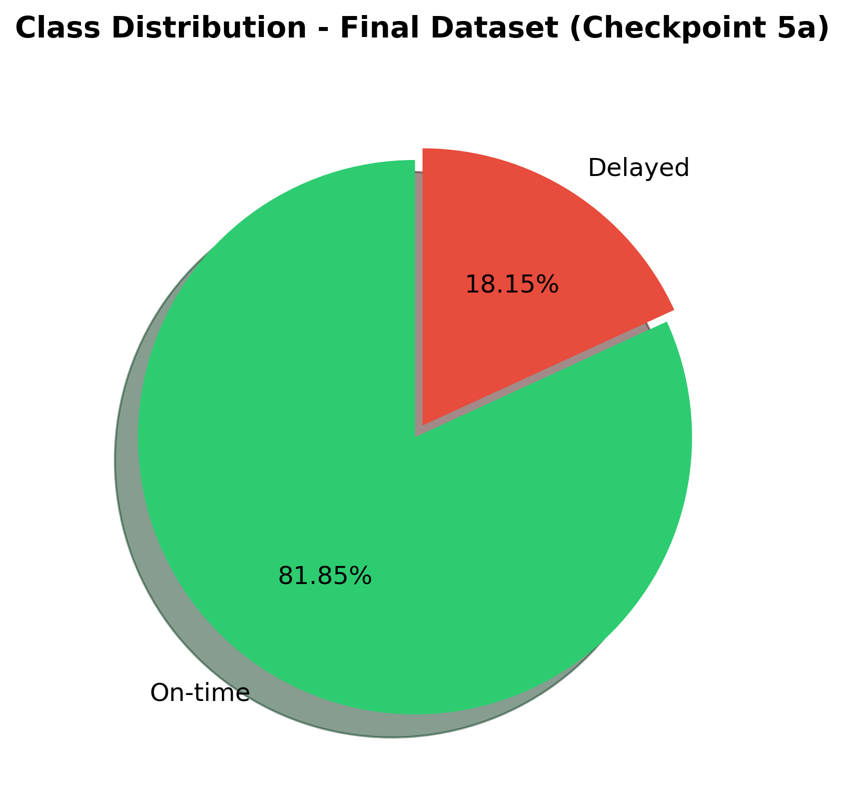

In [0]:
from IPython.display import display, Image, Markdown
from PIL import Image
img_path = "/dbfs/student-groups/Group_4_4/Charts_5Y/phase3_class_balance.png"
img_resized_path = img_path.replace(".png", "_resized.png")
img = Image.open(img_path)
img = img.resize((img.width // 2, img.height // 2))  # Reduce dimensions by half
img.save(img_resized_path, optimize=True, quality=30)  # Compress and save to new file
img_resized = Image.open(img_resized_path)
display(img_resized)

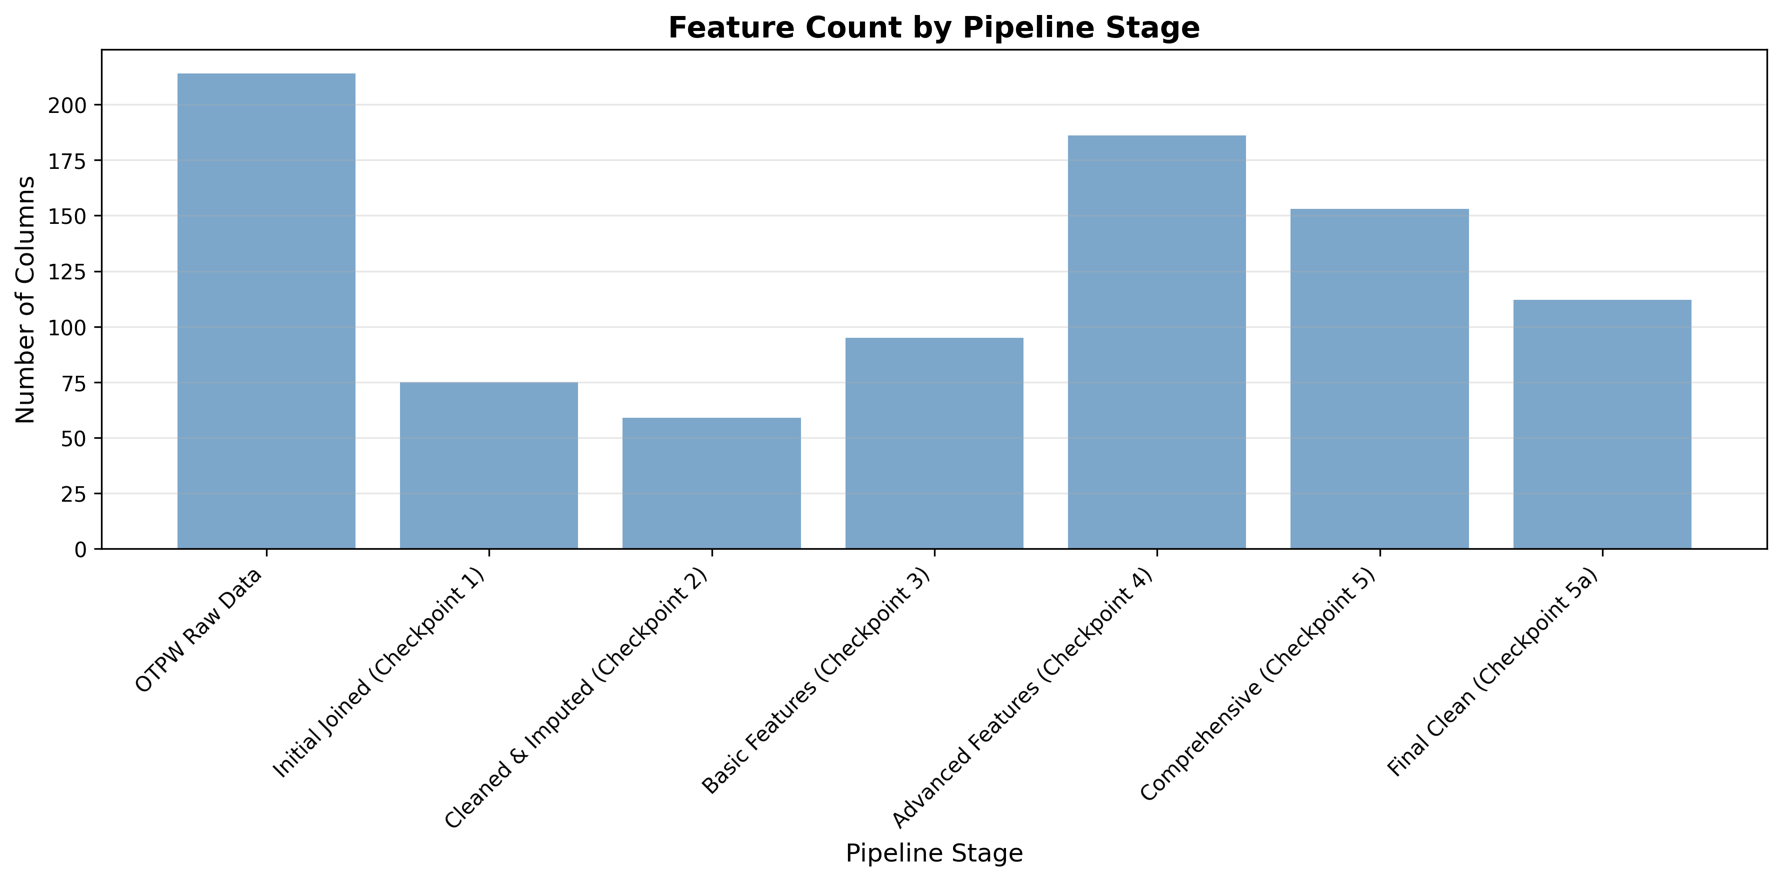

In [0]:
from IPython.display import display, Image, Markdown
from PIL import Image
img_path = "/dbfs/student-groups/Group_4_4/Charts_5Y/phase3_pipeline_column_progression.png"
img_resized_path = img_path.replace(".png", "_resized.png")
img = Image.open(img_path)
img = img.resize((img.width // 2, img.height // 2))  # Reduce dimensions by half
img.save(img_resized_path, optimize=True, quality=30)  # Compress and save to new file
img_resized = Image.open(img_resized_path)
display(img_resized)

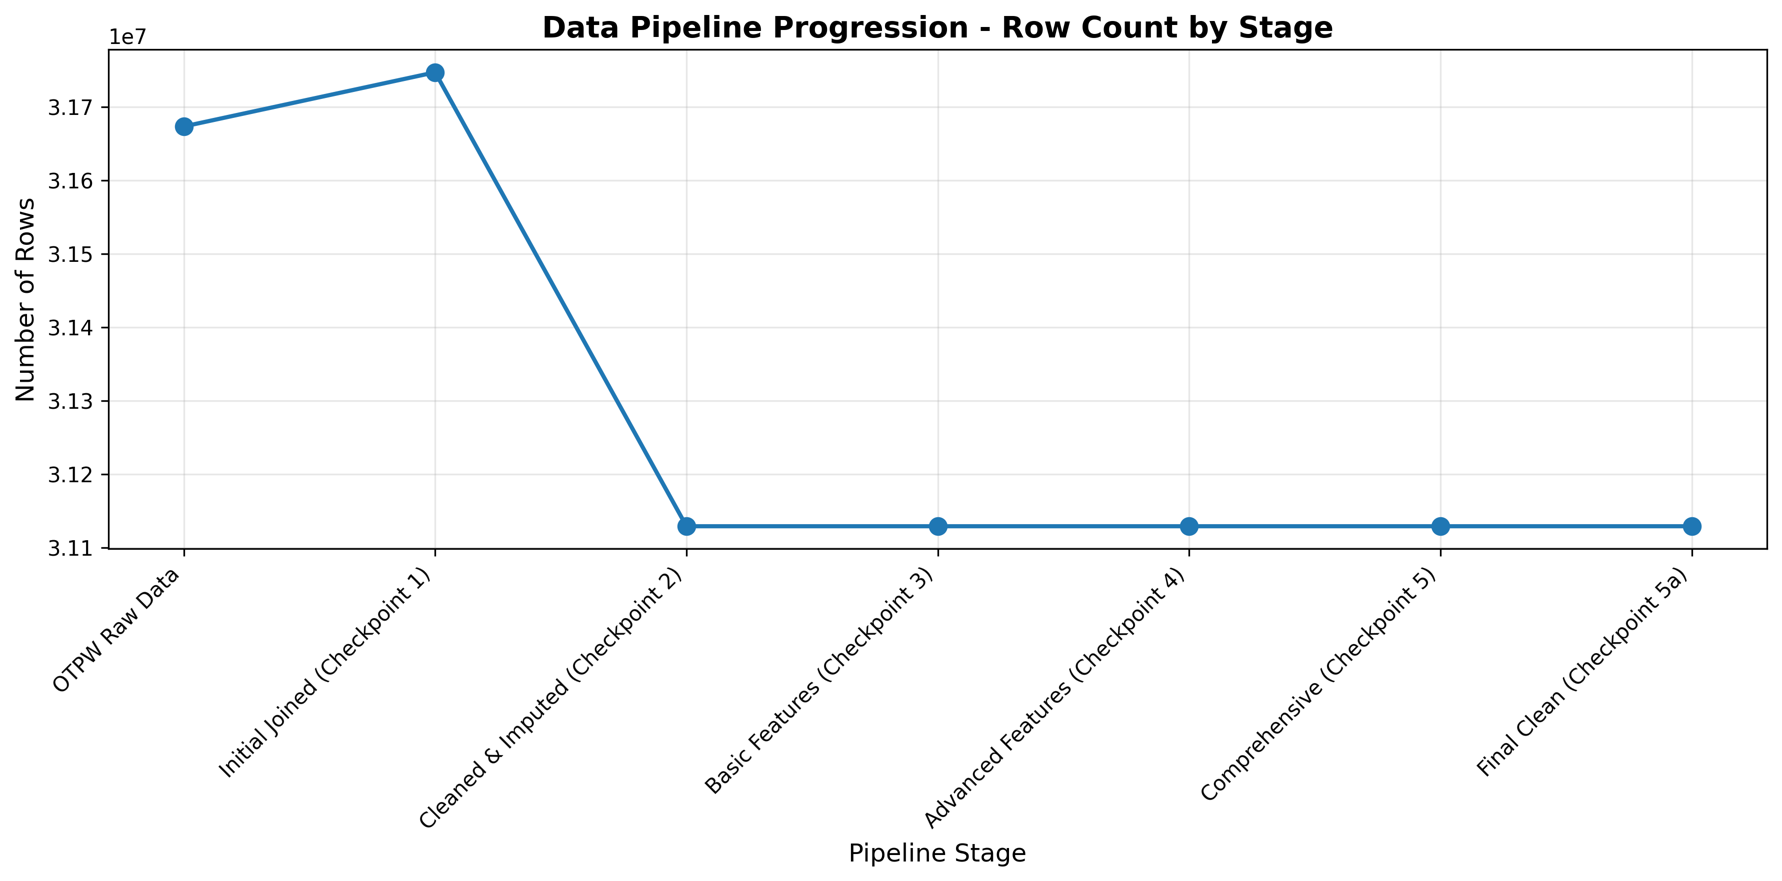

In [0]:
from IPython.display import display, Image, Markdown
from PIL import Image
img_path = "/dbfs/student-groups/Group_4_4/Charts_5Y/phase3_pipeline_row_progression.png"
img_resized_path = img_path.replace(".png", "_resized.png")
img = Image.open(img_path)
img = img.resize((img.width // 2, img.height // 2))  # Reduce dimensions by half
img.save(img_resized_path, optimize=True, quality=30)  # Compress and save to new file
img_resized = Image.open(img_resized_path)
display(img_resized)

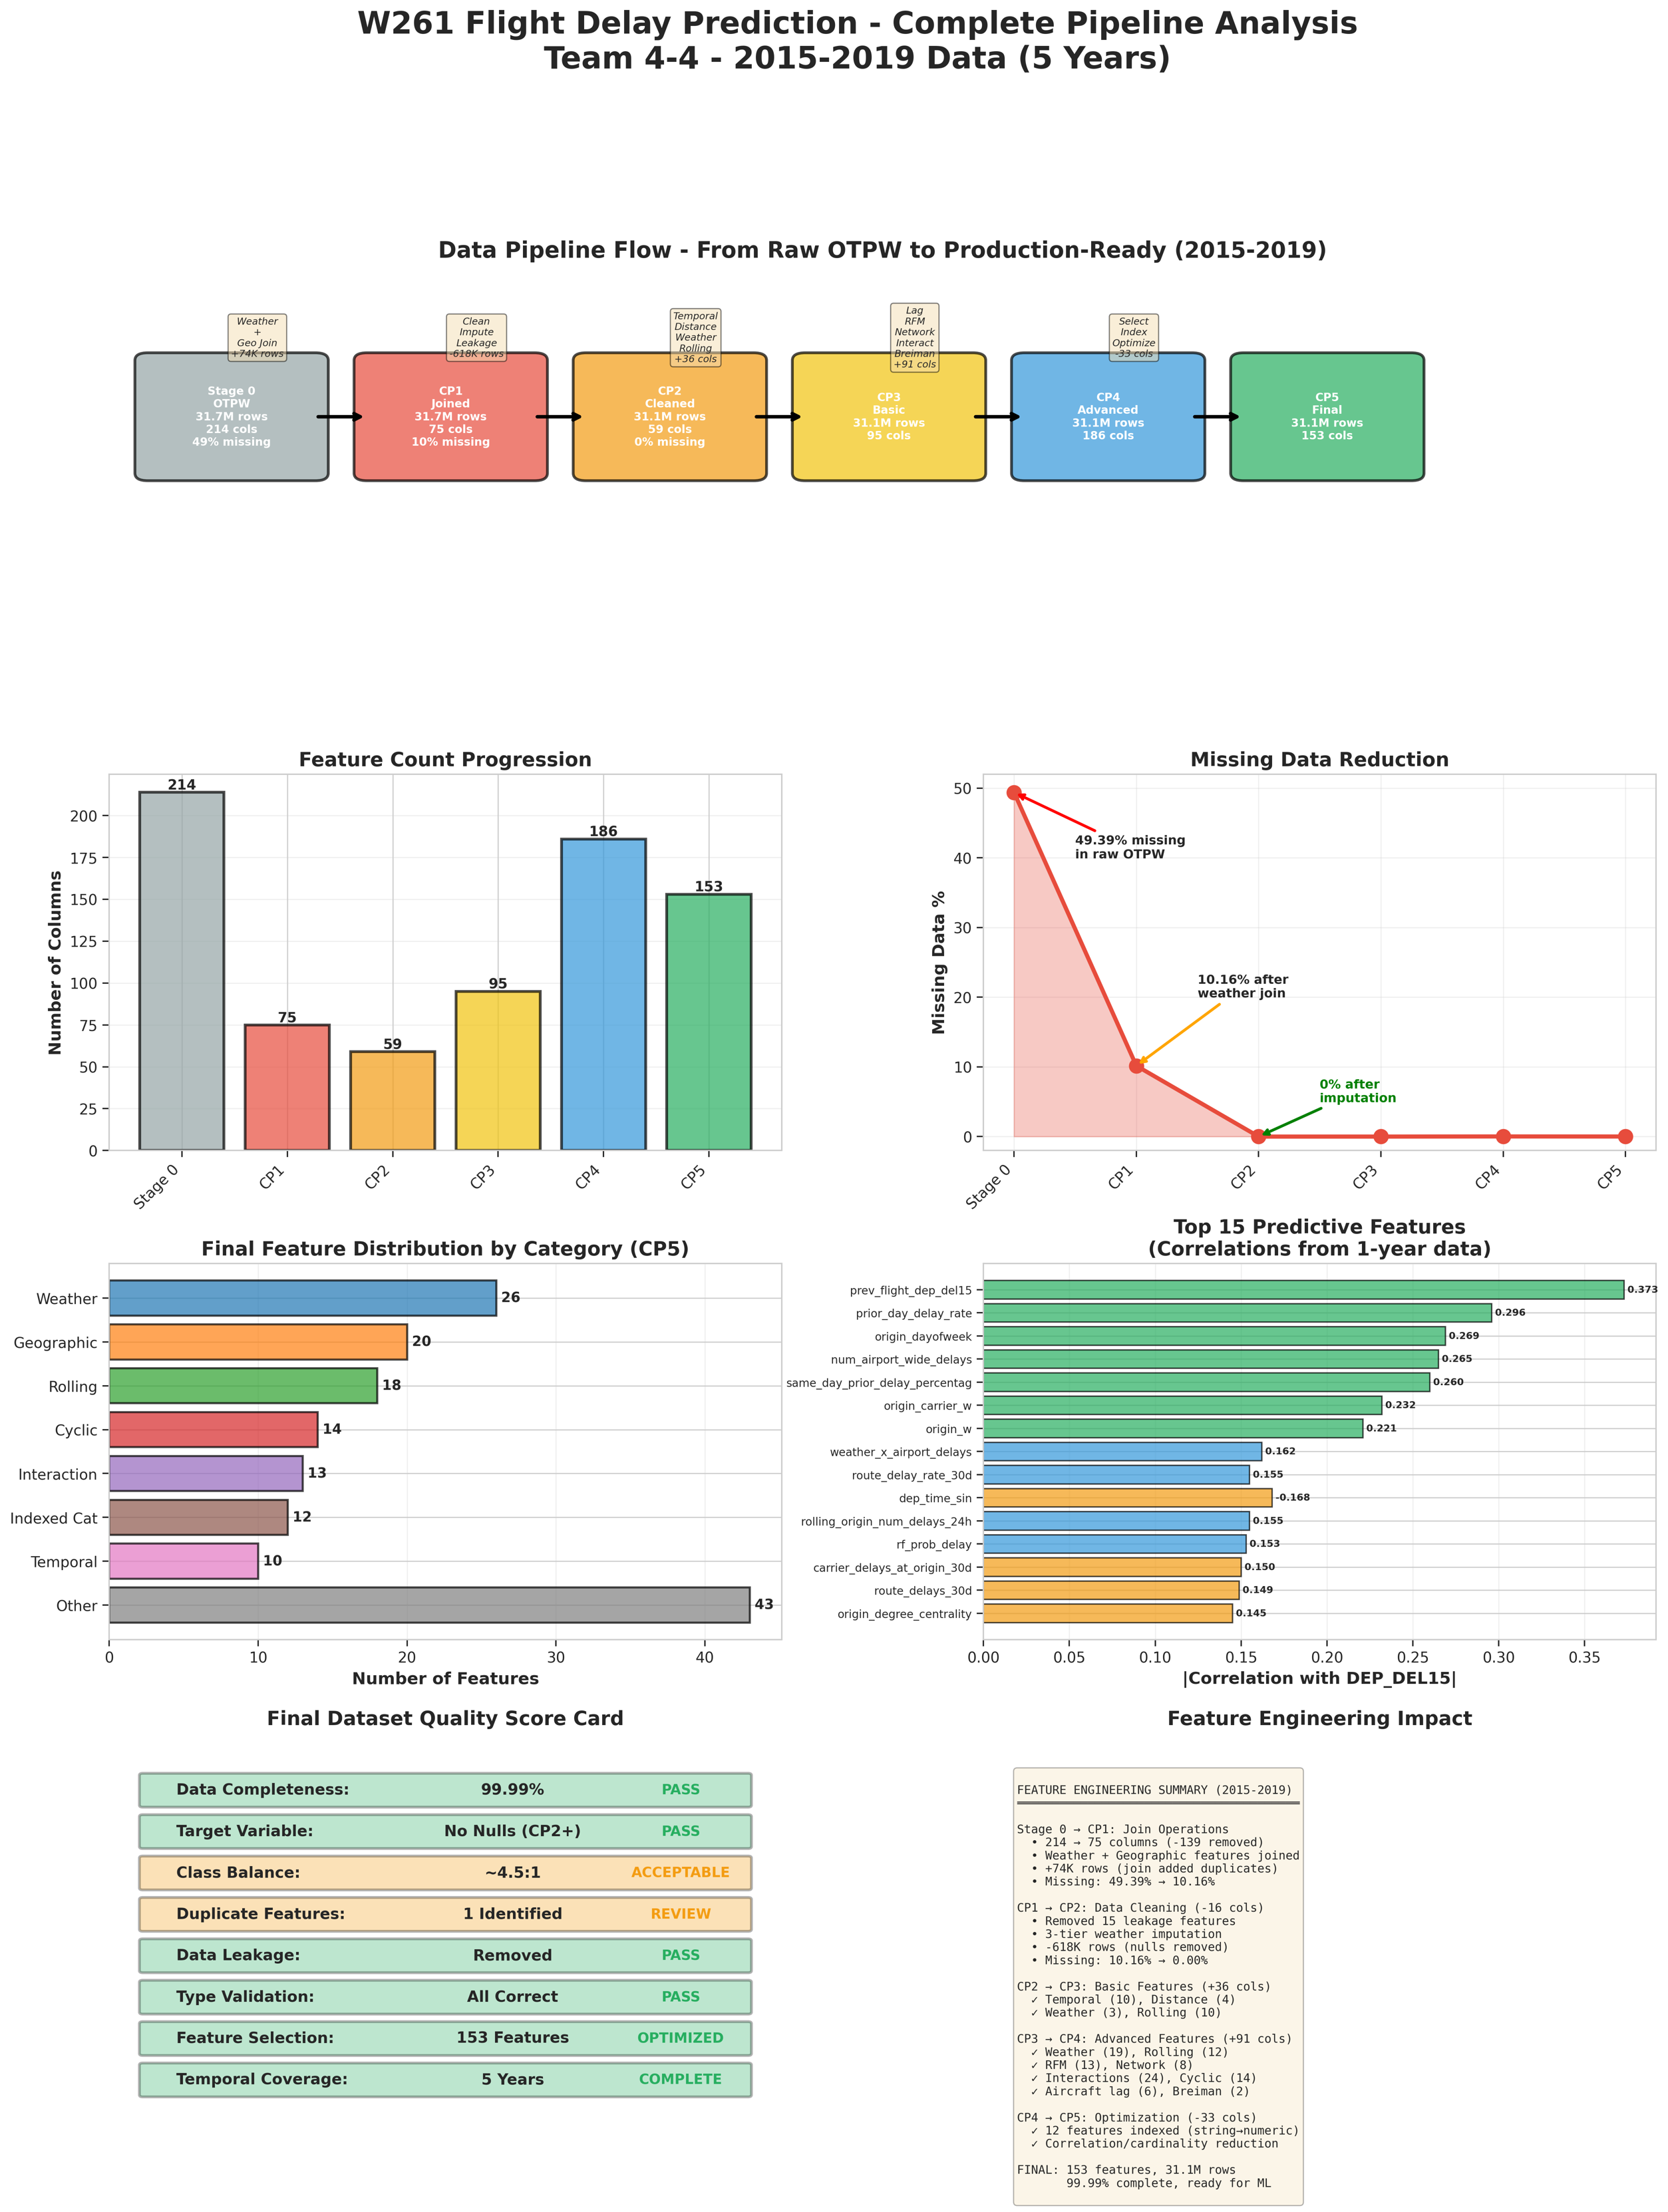

In [0]:
from IPython.display import display, Image, Markdown
from PIL import Image
img_path = "/dbfs/student-groups/Group_4_4/Charts_5Y/comprehensive_pipeline_analysis.png"
img_resized_path = img_path.replace(".png", "_resized.png")
img = Image.open(img_path)
img = img.resize((img.width // 2, img.height // 2))  # Reduce dimensions by half
img.save(img_resized_path, optimize=True, quality=30)  # Compress and save to new file
img_resized = Image.open(img_resized_path)
display(img_resized)

In [0]:
"""
Phase 3 Data Dictionary Generator
Creates comprehensive data dictionary for Final Clean Dataset (Checkpoint 5a - Production Ready)

Run this in a Databricks notebook after the main statistics collection.
"""

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, countDistinct, min, max, mean, stddev
import pandas as pd
from datetime import datetime

print("=" * 100)
print("PHASE 3: DATA DICTIONARY GENERATOR")
print("=" * 100)
print(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 100)

# Paths
BASE_PATH = "dbfs:/student-groups/Group_4_4/"
OUTPUT_PATH = "/dbfs/student-groups/Group_4_4/Charts_5Y/"

# Load final dataset (Checkpoint 5a - Production Ready)
print("\nLoading Checkpoint 5a: Final Clean Dataset (Production Ready)...")
df_final = spark.read.parquet(f"{BASE_PATH}checkpoint_5_final_clean_2015-2019_refined.parquet")

print(f"✓ Dataset loaded: {df_final.count():,} rows x {len(df_final.columns)} columns")

# =============================================================================
# FEATURE DESCRIPTIONS
# =============================================================================

# Known feature descriptions
feature_descriptions = {
    # Target
    'DEP_DEL15': 'Binary target: 1 if departure delayed ≥15 minutes, 0 otherwise',
    
    # Flight Identifiers
    'FL_DATE': 'Flight date (YYYY-MM-DD)',
    'YEAR': 'Year of flight',
    'QUARTER': 'Quarter of year (1-4)',
    'MONTH': 'Month of flight (1-12)',
    'DAY_OF_MONTH': 'Day of month (1-31)',
    'DAY_OF_WEEK': 'Day of week (1=Monday, 7=Sunday)',
    'OP_UNIQUE_CARRIER': 'Unique carrier code (airline)',
    'OP_CARRIER_FL_NUM': 'Flight number',
    'TAIL_NUM': 'Aircraft tail number',
    
    # Airport Information
    'ORIGIN': 'Origin airport code (IATA)',
    'ORIGIN_AIRPORT_ID': 'Origin airport ID',
    'ORIGIN_CITY_NAME': 'Origin city name',
    'ORIGIN_STATE_ABR': 'Origin state abbreviation',
    'DEST': 'Destination airport code (IATA)',
    'DEST_AIRPORT_ID': 'Destination airport ID',
    'DEST_CITY_NAME': 'Destination city name',
    'DEST_STATE_ABR': 'Destination state abbreviation',
    
    # Timing
    'CRS_DEP_TIME': 'Scheduled departure time (HHMM format)',
    'CRS_ARR_TIME': 'Scheduled arrival time (HHMM format)',
    'CRS_ELAPSED_TIME': 'Scheduled elapsed time of flight (minutes)',
    
    # Distance
    'DISTANCE': 'Distance between airports (miles)',
    'DISTANCE_GROUP': 'Distance group category',
    
    # Temporal Features
    'departure_hour': 'Hour of scheduled departure (0-23)',
    'departure_month': 'Month of departure (1-12)',
    'departure_dayofweek': 'Day of week (0=Monday, 6=Sunday)',
    'is_weekend': 'Binary: 1 if weekend (Sat/Sun), 0 otherwise',
    'is_peak_hour': 'Binary: 1 if peak travel hour (6-9am, 4-7pm), 0 otherwise',
    'season': 'Season of year (Spring/Summer/Fall/Winter)',
    'hour_category': 'Time of day category (Early Morning/Morning/Afternoon/Evening/Night)',
    'is_holiday_window': 'Binary: 1 if within major holiday period, 0 otherwise',
    
    # Distance Categories
    'distance_category': 'Flight distance category (Short <500mi / Medium 500-1500mi / Long >1500mi)',
    
    # Weather Features (common ones)
    'HourlyAltimeterSetting': 'Altimeter setting in inches of mercury',
    'HourlyDewPointTemperature': 'Dew point temperature in Fahrenheit',
    'HourlyDryBulbTemperature': 'Dry bulb temperature in Fahrenheit',
    'HourlyPrecipitation': 'Precipitation amount in inches',
    'HourlyPresentWeatherType': 'Present weather type code',
    'HourlyPressureChange': 'Pressure change in last 3 hours',
    'HourlyRelativeHumidity': 'Relative humidity percentage',
    'HourlySeaLevelPressure': 'Sea level pressure in inches of mercury',
    'HourlyStationPressure': 'Station pressure in inches of mercury',
    'HourlyVisibility': 'Visibility in miles',
    'HourlyWetBulbTemperature': 'Wet bulb temperature in Fahrenheit',
    'HourlyWindDirection': 'Wind direction in degrees',
    'HourlyWindSpeed': 'Wind speed in miles per hour',
    'weather_severity_index': 'Composite weather severity index (0-100, higher = more severe)',
}

def categorize_feature(feature_name):
    """Categorize a feature based on its name"""
    name_lower = feature_name.lower()
    
    if feature_name == 'DEP_DEL15':
        return 'target'
    elif feature_name in ['FL_DATE', 'YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
                          'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'TAIL_NUM']:
        return 'flight_identifiers'
    elif any(x in name_lower for x in ['origin', 'dest']) and not any(x in name_lower for x in ['rolling', 'delay', 'ratio']):
        return 'airport_info'
    elif any(x in name_lower for x in ['crs_dep', 'crs_arr', 'crs_elapsed']):
        return 'timing_scheduled'
    elif 'distance' in name_lower:
        return 'distance'
    elif any(x in name_lower for x in ['hourly', 'daily', 'sky', 'precipitation', 'visibility', 'pressure', 'humidity']):
        return 'weather_observations'
    elif any(x in name_lower for x in ['departure_hour', 'departure_month', 'departure_day', 'is_weekend', 
                                       'is_peak', 'season', 'hour_category', 'is_holiday']):
        return 'temporal_features'
    elif any(x in name_lower for x in ['rolling', '_24h', '_ratio', '_avg', '_median', '_std']):
        return 'rolling_aggregates'
    elif any(x in name_lower for x in ['total_flights', 'congestion', 'delay_rate', 'delay_ratio']) and 'rolling' not in name_lower:
        return 'airport_carrier_metrics'
    elif 'weather_severity' in name_lower or 'weather_category' in name_lower:
        return 'weather_derived'
    elif any(x in name_lower for x in ['route', 'pair']):
        return 'route_features'
    else:
        return 'other'

def get_description(feature_name, category):
    """Get or generate description for a feature"""
    
    # Check if we have a predefined description
    if feature_name in feature_descriptions:
        return feature_descriptions[feature_name]
    
    # Generate description based on patterns
    name_lower = feature_name.lower()
    
    if 'rolling_' in name_lower and '_24h' in name_lower:
        base = feature_name.replace('rolling_', '').replace('_24h', '')
        return f"24-hour rolling window statistic: {base}"
    elif 'rolling_' in name_lower:
        base = feature_name.replace('rolling_', '')
        return f"Rolling window statistic: {base}"
    elif name_lower.startswith('hourly'):
        return f"Hourly weather observation: {feature_name.replace('Hourly', '')}"
    elif name_lower.startswith('daily'):
        return f"Daily weather summary: {feature_name.replace('Daily', '')}"
    elif 'total_flights_per' in name_lower:
        return "Total number of flights for this origin/destination/day combination"
    elif 'delay_rate' in name_lower or 'delay_ratio' in name_lower:
        if 'origin' in name_lower:
            return "Historical delay rate for origin airport"
        elif 'dest' in name_lower:
            return "Historical delay rate for destination airport"
        elif 'carrier' in name_lower:
            return "Historical delay rate for carrier"
        else:
            return "Historical delay rate metric"
    elif 'congestion' in name_lower:
        return "Airport congestion index"
    elif 'performance' in name_lower:
        return "Performance metric"
    
    # Generic description based on category
    category_descriptions = {
        'target': 'Target variable',
        'flight_identifiers': 'Flight identification information',
        'airport_info': 'Airport location information',
        'timing_scheduled': 'Scheduled timing information',
        'distance': 'Flight distance metric',
        'weather_observations': 'Weather observation data',
        'temporal_features': 'Engineered time-based feature',
        'rolling_aggregates': 'Rolling window aggregate statistic',
        'airport_carrier_metrics': 'Airport or carrier performance metric',
        'weather_derived': 'Derived weather feature',
        'route_features': 'Route characteristic feature',
        'other': 'Additional feature'
    }
    
    return category_descriptions.get(category, 'Feature')

# =============================================================================
# BUILD DATA DICTIONARY
# =============================================================================

print("\n" + "=" * 100)
print("BUILDING DATA DICTIONARY")
print("=" * 100)

data_dict_rows = []

for field in df_final.schema.fields:
    feature_name = field.name
    data_type = str(field.dataType)
    
    # Categorize
    category = categorize_feature(feature_name)
    description = get_description(feature_name, category)
    
    print(f"Processing: {feature_name}...")
    
    try:
        # Get basic statistics
        if 'int' in data_type.lower() or 'double' in data_type.lower() or 'float' in data_type.lower():
            # Numerical feature
            stats = df_final.select(
                count(col(feature_name)).alias('count'),
                countDistinct(col(feature_name)).alias('distinct'),
                min(col(feature_name)).alias('min'),
                max(col(feature_name)).alias('max'),
                mean(col(feature_name)).alias('mean'),
                stddev(col(feature_name)).alias('std')
            ).first()
            
            dict_row = {
                'Feature_Name': feature_name,
                'Category': category,
                'Data_Type': 'Numerical',
                'Description': description,
                'Non_Null_Count': stats['count'] if stats else 0,
                'Distinct_Values': stats['distinct'] if stats else 0,
                'Min': f"{stats['min']:.2f}" if stats and stats['min'] is not None else 'N/A',
                'Max': f"{stats['max']:.2f}" if stats and stats['max'] is not None else 'N/A',
                'Mean': f"{stats['mean']:.2f}" if stats and stats['mean'] is not None else 'N/A',
                'Std': f"{stats['std']:.2f}" if stats and stats['std'] is not None else 'N/A'
            }
        else:
            # Categorical feature
            stats = df_final.select(
                count(col(feature_name)).alias('count'),
                countDistinct(col(feature_name)).alias('distinct')
            ).first()
            
            dict_row = {
                'Feature_Name': feature_name,
                'Category': category,
                'Data_Type': 'Categorical',
                'Description': description,
                'Non_Null_Count': stats['count'] if stats else 0,
                'Distinct_Values': stats['distinct'] if stats else 0,
                'Min': 'N/A',
                'Max': 'N/A',
                'Mean': 'N/A',
                'Std': 'N/A'
            }
    
    except Exception as e:
        print(f"  ⚠ Error: {e}")
        dict_row = {
            'Feature_Name': feature_name,
            'Category': category,
            'Data_Type': 'Unknown',
            'Description': description,
            'Non_Null_Count': 'Error',
            'Distinct_Values': 'Error',
            'Min': 'N/A',
            'Max': 'N/A',
            'Mean': 'N/A',
            'Std': 'N/A'
        }
    
    data_dict_rows.append(dict_row)

# Create DataFrame
df_dict = pd.DataFrame(data_dict_rows)

# Sort by category then feature name
df_dict = df_dict.sort_values(['Category', 'Feature_Name'])

# =============================================================================
# DISPLAY DATA DICTIONARY BY CATEGORY
# =============================================================================

print("\n" + "=" * 100)
print("DATA DICTIONARY BY CATEGORY")
print("=" * 100)

for category in sorted(df_dict['Category'].unique()):
    cat_features = df_dict[df_dict['Category'] == category]
    print(f"\n{category.upper().replace('_', ' ')} ({len(cat_features)} features)")
    print("=" * 100)
    
    for _, row in cat_features.iterrows():
        print(f"\n  {row['Feature_Name']}")
        print(f"    Type: {row['Data_Type']}")
        print(f"    Description: {row['Description']}")
        print(f"    Non-Null: {row['Non_Null_Count']}, Distinct: {row['Distinct_Values']}")
        if row['Mean'] != 'N/A':
            print(f"    Range: [{row['Min']}, {row['Max']}], Mean: {row['Mean']}, Std: {row['Std']}")

# =============================================================================
# SAVE DATA DICTIONARY
# =============================================================================

print("\n" + "=" * 100)
print("SAVING DATA DICTIONARY")
print("=" * 100)

# Save full dictionary
dict_path = f"{OUTPUT_PATH}phase3_data_dictionary.csv"
df_dict.to_csv(dict_path, index=False)
print(f"✓ Full data dictionary saved to: {dict_path}")
print(f"  Total features documented: {len(df_dict)}")

# Create and save category summary
category_summary = df_dict.groupby('Category').agg({
    'Feature_Name': 'count',
    'Data_Type': lambda x: f"{sum(x=='Numerical')} numerical, {sum(x=='Categorical')} categorical"
}).rename(columns={'Feature_Name': 'Count', 'Data_Type': 'Type_Breakdown'})

print("\n" + "=" * 100)
print("FEATURE SUMMARY BY CATEGORY")
print("=" * 100)
print(category_summary.to_string())

summary_path = f"{OUTPUT_PATH}phase3_feature_category_summary.csv"
category_summary.to_csv(summary_path)
print(f"\n✓ Category summary saved to: {summary_path}")

# Create data type summary
print("\n" + "=" * 100)
print("DATA TYPE DISTRIBUTION")
print("=" * 100)

type_summary = df_dict['Data_Type'].value_counts()
print(type_summary.to_string())

print("\n" + "=" * 100)
print("DATA DICTIONARY GENERATION COMPLETE!")
print("=" * 100)

print(f"\n📁 Generated Files:")
print(f"  • {dict_path}")
print(f"  • {summary_path}")

print("\n💡 Data dictionary DataFrame available as 'df_dict' for further analysis")
print("=" * 100)


PHASE 3: DATA DICTIONARY GENERATOR
Generated: 2025-12-14 01:56:01

Loading Checkpoint 5a: Final Clean Dataset (Production Ready)...
✓ Dataset loaded: 31,128,891 rows x 112 columns

BUILDING DATA DICTIONARY
Processing: DEST...
Processing: ORIGIN...
Processing: OP_UNIQUE_CARRIER...
Processing: FL_DATE...
Processing: prediction_utc...
Processing: origin_obs_utc...
Processing: asof_minutes...
Processing: DAY_OF_MONTH...
Processing: DAY_OF_WEEK...
Processing: OP_CARRIER_FL_NUM...
Processing: CRS_ARR_TIME...
Processing: ORIGIN_AIRPORT_ID...
Processing: ORIGIN_STATE_ABR...
Processing: DEST_AIRPORT_ID...
Processing: DEST_STATE_ABR...
Processing: HourlyDryBulbTemperature...
Processing: HourlyDewPointTemperature...
Processing: HourlyWindDirection...
Processing: HourlyWindGustSpeed...
Processing: HourlyVisibility...
Processing: HourlyRelativeHumidity...
Processing: HourlyStationPressure...
Processing: HourlyAltimeterSetting...
Processing: origin_airport_lat...
Processing: origin_airport_lon...
Pr